

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    



### Importing the data

In [1]:
#import Libraries 
import pandas as pd
import numpy as np


In [2]:
#import Data
df = pd.read_csv('/content/Churn.csv')

### Understanding the data

In [3]:
#Show Data  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Getting Info About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# getting columns Name
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [7]:
binary_cols # categorical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

### Data Manipulation

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Cheack Correlations between columns
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [10]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(df.apply(num_missing, axis=1).head())#axis=1 defines that function is to be applied on each row

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [11]:
pd.crosstab(df.SeniorCitizen,df.tenure)

tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
SeniorCitizen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,527,195,175,150,109,97,108,99,103,104,82,106,93,62,83,62,75,82,64,53,52,79,73,78,69,65,54,47,58,57,55,49,52,53,72,43,54,47,50,54,61,57,51,41,49,61,57,57,56,54,58,67,61,54,50,64,50,59,51,61,67,61,65,66,57,67,82,87,82,102,139,306
1,0,86,43,25,26,24,13,23,24,16,12,17,11,16,14,16,18,12,15,9,18,11,11,12,16,10,14,18,10,14,15,10,20,12,12,16,7,11,12,6,10,9,8,14,10,12,13,11,7,10,14,10,13,9,14,14,16,15,8,9,15,9,9,7,14,19,22,16,13,13,17,31,56


In [12]:
#Check 
df.loc[(df["gender"]=="Male") & (df["Contract"]=="Month-to-month") & (df["Churn"]=="Yes"), 
       ["gender","Contract","Churn"]]

,gender,Contract,Churn
2,Male,Month-to-month,Yes
13,Male,Month-to-month,Yes
20,Male,Month-to-month,Yes
22,Male,Month-to-month,Yes
26,Male,Month-to-month,Yes
...,...,...,...
7006,Male,Month-to-month,Yes
7009,Male,Month-to-month,Yes
7018,Male,Month-to-month,Yes
7032,Male,Month-to-month,Yes


In [13]:
# Data Sorted
data_sorted = df.sort_values(['tenure','MonthlyCharges','TotalCharges'], ascending=False)
data_sorted[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
4586,72,118.75,8672.45
6118,72,118.20,8547.15
4610,72,117.80,8684.8
3205,72,117.60,8308.9
6768,72,117.50,8670.1
...,...,...,...
3826,0,25.35,
753,0,20.25,
4380,0,20.00,
3331,0,19.85,


### Data Visualization

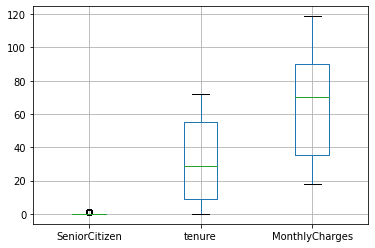

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


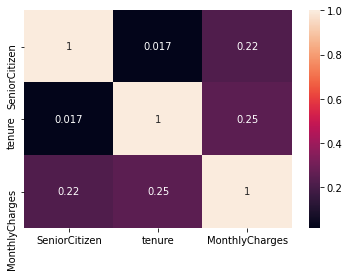

In [15]:
#Check Heat map 
import seaborn as sns

sns.heatmap(df.corr(), annot=True)


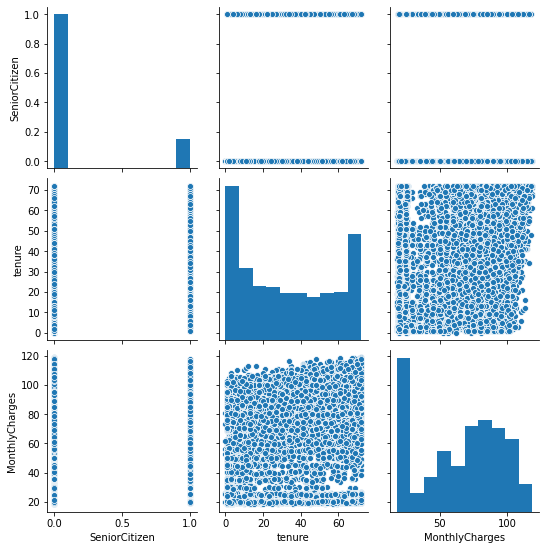

In [16]:
#pairplot for correlations
sns.pairplot(df)


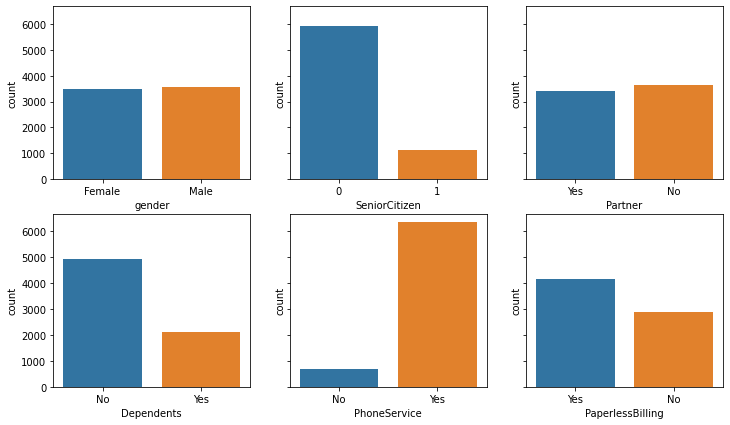

In [17]:
#Binary categorical features
#Let's check the class distribution of binary features.
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [18]:
#target variable change in binary.“Yes” will be 1 and “No” will be 0.
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [19]:
# churn rate is different for males and females:
df[['gender','Churn']].groupby(['gender']).mean()


,Churn
gender,
Female,0.269209
Male,0.261603


Average churn rate for males and females are approximately the same

In [20]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [21]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [22]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [23]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [24]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


the other binary features have an effect on the target veriable.phone service may also skip if you think 2% difference.

In [25]:
#Use pivot_table function to check the relation between fetures and target veriable.
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [26]:
table = pd.pivot_table(df, values='Churn', index=['Partner'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


### Other Categorical Feature

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


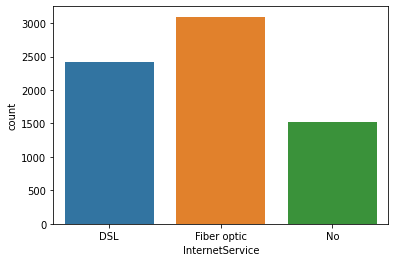

In [27]:
#Internet Service
sns.countplot("InternetService", data=df)
df[['InternetService','Churn']].groupby('InternetService').mean()


internet service variable is most important in churn predicting rate.as u can see,customers with fiber optic internet service are much likely.

In [28]:
#check the monthly charges.
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL 

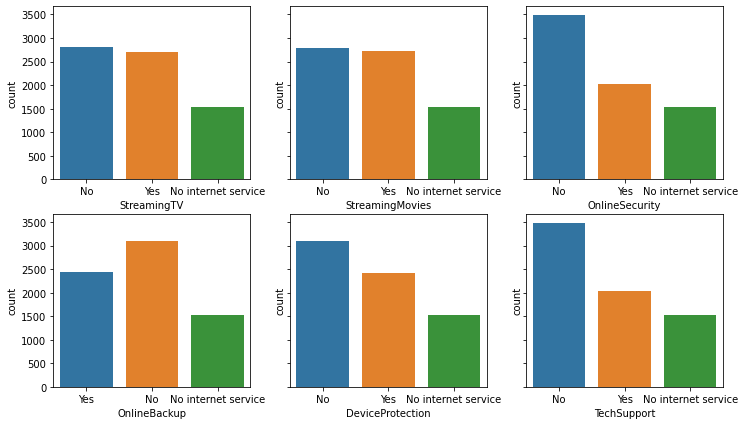

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [30]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [31]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [32]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [33]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [34]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()


,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [35]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


All internet service related features seem to have different churn rates for their classes.
### Phone service

In [36]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

### contract and payment method

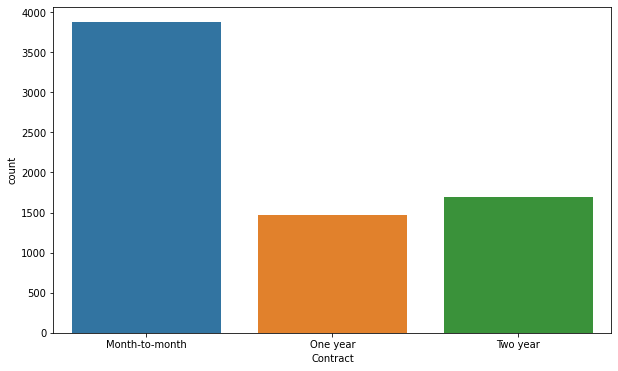

In [37]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

In [38]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


customers with short-term contract are more likely to churn

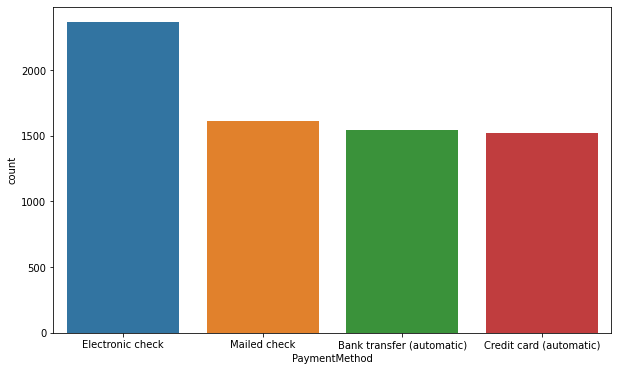

In [39]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

In [40]:

df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


### Drop Column 
I have decided not to use following variable because they add little or no informative power to the model: 1) Customer ID 2) Gender 3) PhoneService 4) Contract 5) TotalCharges

In [41]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [42]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


### Data Preprocessing

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [44]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [45]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [46]:
X['tenure'] = a
X['MonthlyCharges'] = b

In [47]:
X.shape

(7043, 26)

### resampling

Text(0.5, 1.0, 'Class Distribution Before Resampling')

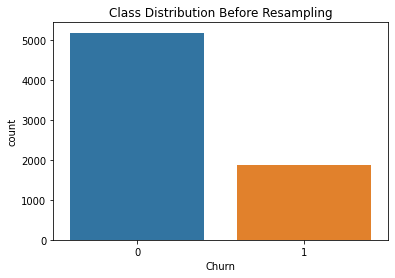

In [48]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [49]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [50]:
print(len(X_no),len(X_yes))

5174 1869


In [51]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [52]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

### ML Model
 divide the data set into training and test

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Model Evaluation
### Ridge Classifier
I have decided to use ridge classifier as a base model.

In [56]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [57]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [58]:
pred = clf_ridge.predict(X_train)  #make predictions on training set

In [59]:
accuracy_score(y_train, pred) #accuracy on training set

0.7574293307562213

In [60]:
confusion_matrix(y_train, pred)

array([[3051, 1079],
       [ 929, 3219]])

In [61]:
pred_test = clf_ridge.predict(X_test)

In [62]:
accuracy_score(y_test, pred_test)

0.7608695652173914

77% accuracy is not very good so we will try to get a better accuracy using a different model.

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)

In [65]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
pred = clf_forest.predict(X_train)

In [67]:
accuracy_score(y_train, pred)

0.8858419908190384

In [68]:
confusion_matrix(y_train, pred)

array([[3420,  710],
       [ 235, 3913]])

In [69]:
pred_test = clf_forest.predict(X_test)

In [70]:
accuracy_score(y_test, pred_test)

0.8415458937198068

The accuracy on training set is 4% higher than the accuracy on test set which indicates a slight overfitting.Another way is to do cross-validation which allows to use every sample in training and test set.

GridSearchCV makes this process easy to handle. We can both do cross-validation and try different parameters using GridSearchCV.

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset

n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [73]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [74]:
clf.best_score_

0.8992079069213581

We have achieved an overall accuracy of almost 90%.This is the mean cross-validated score of the best_estimator. In the previous random forest, the mean score was approximately 86% (88% on training and 84% on test). Using GridSearchCV, we improved the model accuracy by 4%.

### Final Conclusions

We can always try to improve the model. The fuel of machine learning models is data so if we can collect more data, it is always helpful in improving the model.

Finally, we can try more robust or advanced models. Please keep in mind that there will be a trade-off when making such kind of decisions. Advanced models may increase the accuracy but they require more data and more computing power. 